In [1]:
import tensorflow as tf
import os

# Load Data

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 440 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

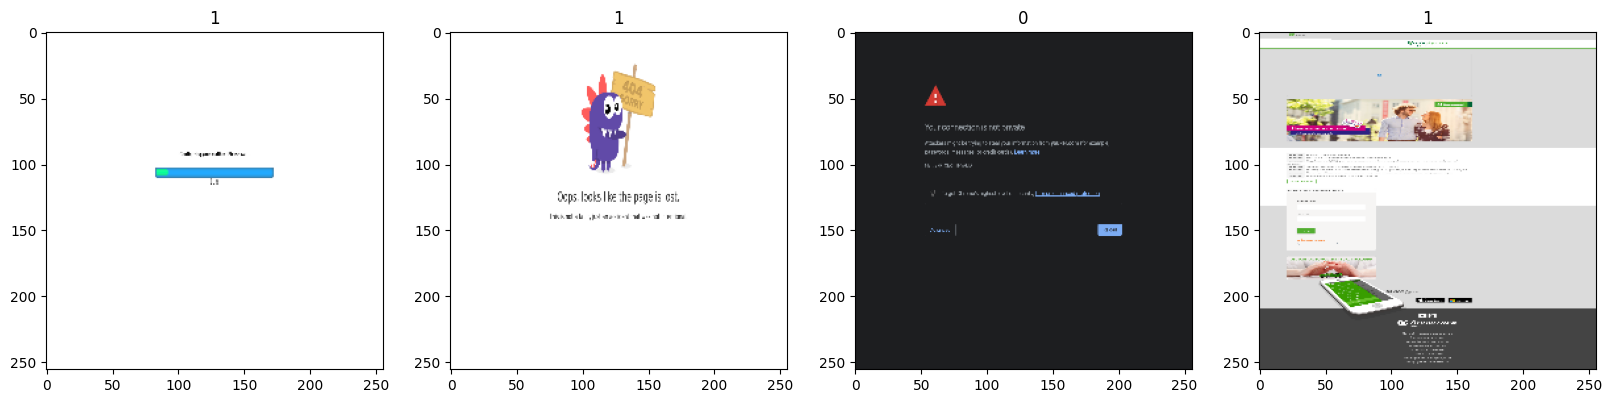

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
batch[1]

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int32)

In [12]:
batch[0].shape

(32, 256, 256, 3)

# Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.98039216, 0.98039216, 0.98039216],
          [0.98039216, 0.98039216, 0.98039216],
          [0.98039216, 0.98039216, 0.98039216]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.7910846 , 0.7910846 , 0.7910846 ],
          [0.75686276, 0.75686276, 0.75686276],
          [0.98039216, 0.98039216, 0.98039216]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.75686276, 0.75686276, 0.75686276],
          [0.75686276, 0.75686276, 0.75686276],
          [0.98039216, 0.98039216, 0.98039216]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Learning Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [22]:
logdir='logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 14s 1s/step - loss: 1.8918 - accuracy: 0.5104 - val_loss: 0.6187 - val_accuracy: 0.6094
Epoch 2/20
9/9 [==============================] - 13s 1s/step - loss: 0.5816 - accuracy: 0.6181 - val_loss: 0.6020 - val_accuracy: 0.5938
Epoch 3/20
9/9 [==============================] - 13s 1s/step - loss: 0.5319 - accuracy: 0.7396 - val_loss: 0.4926 - val_accuracy: 0.6562
Epoch 4/20
9/9 [==============================] - 14s 1s/step - loss: 0.4521 - accuracy: 0.8056 - val_loss: 0.3750 - val_accuracy: 0.9531
Epoch 5/20
9/9 [==============================] - 14s 1s/step - loss: 0.4002 - accuracy: 0.8542 - val_loss: 0.3940 - val_accuracy: 0.8906
Epoch 6/20
9/9 [==============================] - 14s 1s/step - loss: 0.4143 - accuracy: 0.8611 - val_loss: 0.3814 - val_accuracy: 0.7812
Epoch 7/20
9/9 [==============================] - 13s 1s/step - loss: 0.3462 - accuracy: 0.8333 - val_loss: 0.2458 - val_accuracy: 0.9375
Epoch 8/20
9/9 [==================

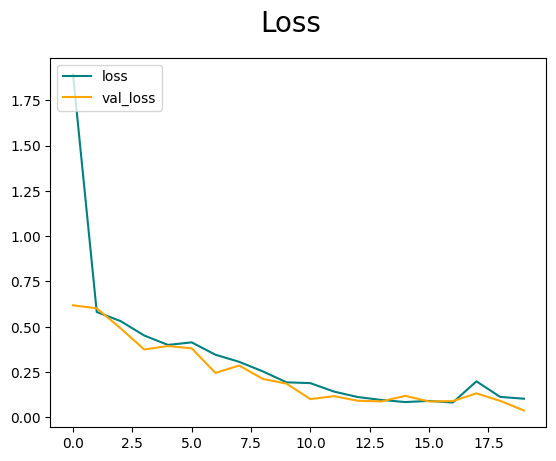

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

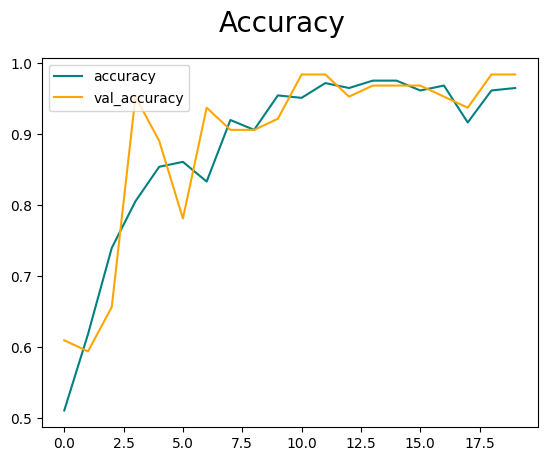

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [28]:
img = cv2.imread('phish.jpg')

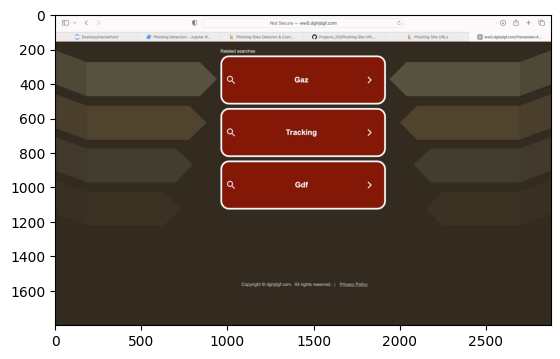

In [29]:
plt.imshow(img)
plt.show()

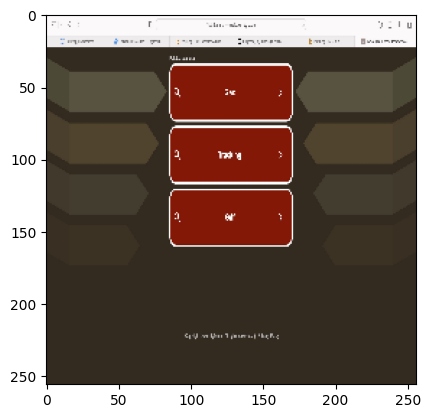

In [30]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [31]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 68ms/step


In [32]:
yhat

array([[3.885163e-05]], dtype=float32)

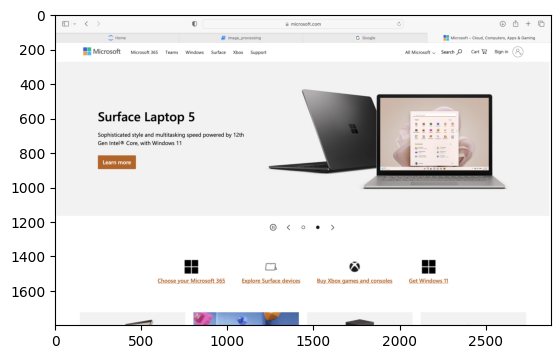

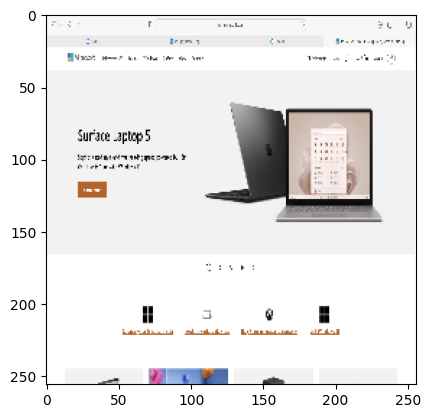

1/1 [==============================] - 0s 16ms/step
[[0.0041461]]


In [57]:
img3 = cv2.imread('microsoft.png')
plt.imshow(img3)
plt.show()

resize = tf.image.resize(img3, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat3 = model.predict(np.expand_dims(resize/255, 0))
print(yhat3)

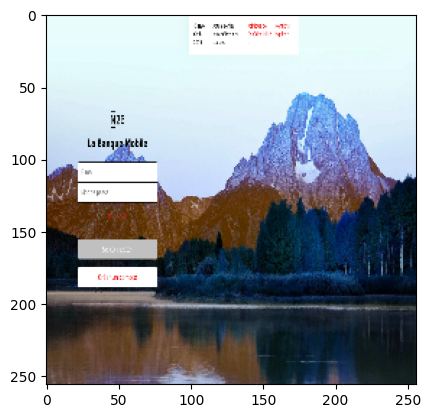

1/1 [==============================] - 0s 14ms/step
[[0.78197694]]


In [35]:
img2 = cv2.imread('phish2.png')
plt.imshow(img2)


resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

yhat3 = model.predict(np.expand_dims(resize2/255, 0))
print(yhat3)

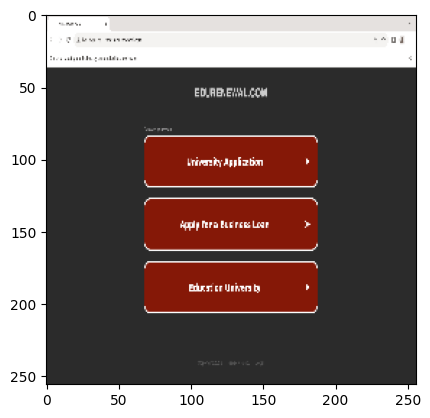

1/1 [==============================] - 0s 16ms/step
[[0.02571795]]


In [41]:
image = cv2.imread('edu_phish.png')
plt.imshow(image)


image_r = tf.image.resize(image, (256,256))
plt.imshow(image_r.numpy().astype(int))
plt.show()

yhatt = model.predict(np.expand_dims(image_r/255, 0))
print(yhatt)

In [42]:
from tensorflow.keras.models import load_model

In [44]:
model.save(os.path.join('models','imageclassifier.h5'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
new_model = load_model(os.path.join('models','imageclassifier'))

In [56]:
new_model.predict(np.expand_dims(image_r/255, 0))

1/1 [==============================] - 0s 17ms/step


array([[0.02571795]], dtype=float32)

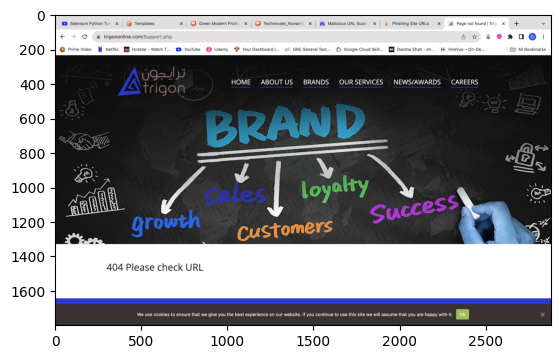

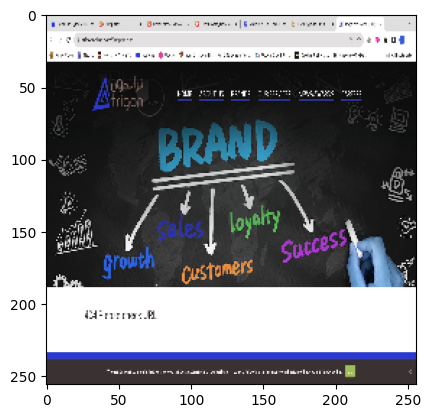

1/1 [==============================] - 0s 14ms/step


array([[3.687313e-05]], dtype=float32)

In [58]:
img3 = cv2.imread('fish.jpg')
plt.imshow(img3)
plt.show()

resized = tf.image.resize(img3, (256,256))
plt.imshow(resized.numpy().astype(int))
plt.show()

new_model.predict(np.expand_dims(resized/255, 0))

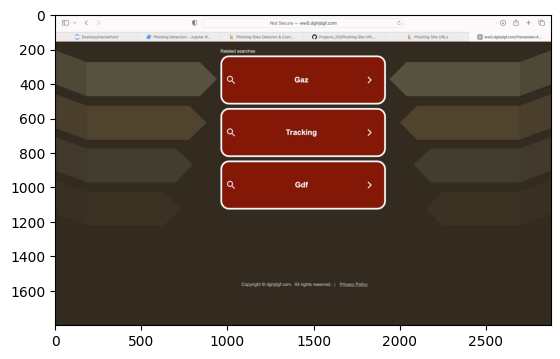

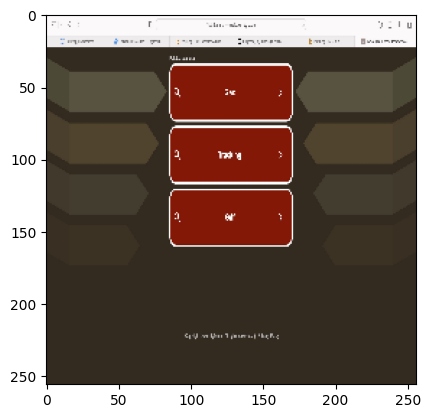

1/1 [==============================] - 0s 14ms/step


array([[3.885163e-05]], dtype=float32)

In [68]:
img3 = cv2.imread('phish.png')
plt.imshow(img3)
plt.show()

resize = tf.image.resize(img3, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

new_model.predict(np.expand_dims(resize/255, 0))

In [69]:
print(type(resize))

<class 'tensorflow.python.framework.ops.EagerTensor'>
